# Bitcoin Price Forecasting Using LSTM

This notebook demonstrates how to use an LSTM model to forecast Bitcoin prices.

## Install and Import Libraries

In [55]:
%pip install numpy pandas matplotlib scikit-learn tensorflow yfinance tabulate

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Brian\OneDrive - University of Witwatersrand\Desktop\off_the_grid\tutorials\technical_analysis\LSTM_bitcoin_price_forecasting\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [56]:
# Importing Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
import yfinance as yf
from tabulate import tabulate

plt.style.use('dark_background')

## Load and Explore Dataset

### Download Data

In [57]:
# Load latest data for simulation
df = yf.download("BTC-USD", start="2010-07-17", end="2025-05-08", auto_adjust=True)
df.columns = df.columns.get_level_values(0)
df = df[['Open', 'Close', 'Volume', 'Low', 'High']]
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Open,Close,Volume,Low,High
Date,,,,,
2014-09-17,465.864014,457.334015,21056800,452.421997,468.174011
2014-09-18,456.859985,424.440002,34483200,413.104004,456.859985
2014-09-19,424.102997,394.795990,37919700,384.532013,427.834991
2014-09-20,394.673004,408.903992,36863600,389.882996,423.295990
2014-09-21,408.084991,398.821014,26580100,393.181000,412.425995


### Visualize Closing Price Chart

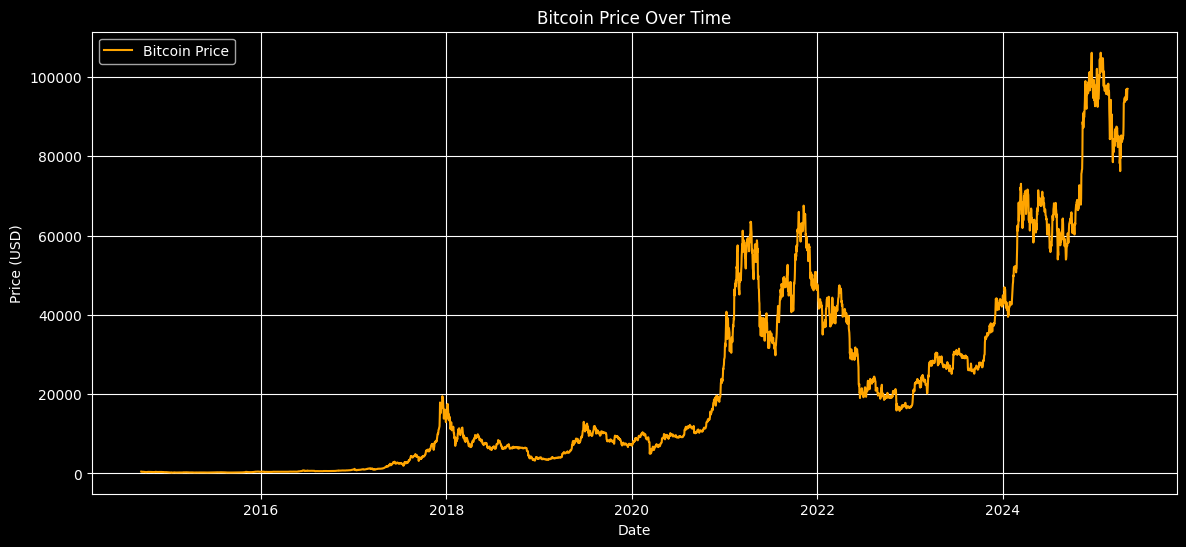

In [58]:
# Visualize the closing priceng price
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Bitcoin Price', color='orange')
plt.title('Bitcoin Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.savefig('bitcoin_price.png', dpi=300)
plt.show()

## Data Preprocessing

### Feature Selection (`Close`)

In [59]:
# Select the feature we want to forecast (e.g., 'Close' price)
data = df['Close'].values.reshape(-1, 1)

### Data Normalization

In [60]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

### Data Split

In [61]:
# Split data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

### Create Input Sequences

In [62]:
# Function to create sequences for LSTM input
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        labels.append(data[i + seq_length])
    return np.array(sequences), np.array(labels)

# Create sequences
sequence_length = 50
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Reshape input to be 3D [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

## Build and Train the LSTM Model

### Build the LSTM Model

In [63]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\Brian\OneDrive - University of Witwatersrand\Desktop\off_the_grid\tutorials\technical_analysis\LSTM_bitcoin_price_forecasting\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Fit the LSTM Model on the Data

In [64]:
# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0103 - val_loss: 0.0021
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.5137e-04 - val_loss: 0.0028
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.8425e-04 - val_loss: 9.3377e-04
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 2.7445e-04 - val_loss: 8.0843e-04
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 2.3355e-04 - val_loss: 8.0702e-04
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.0247e-04 - val_loss: 0.0010
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 1.7472e-04 - val_loss: 9.6535e-04
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.3170e-04 - val_loss: 6.0622e-04
Epoch 9/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 1.6830e-04 - val_loss: 0.0022
Epoch 10/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 1.7666e-04 - val_loss: 5.8613e-04
Epoch 11/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 1.2771e-04 - val_loss: 5.9891

### Plot Training History/Progress

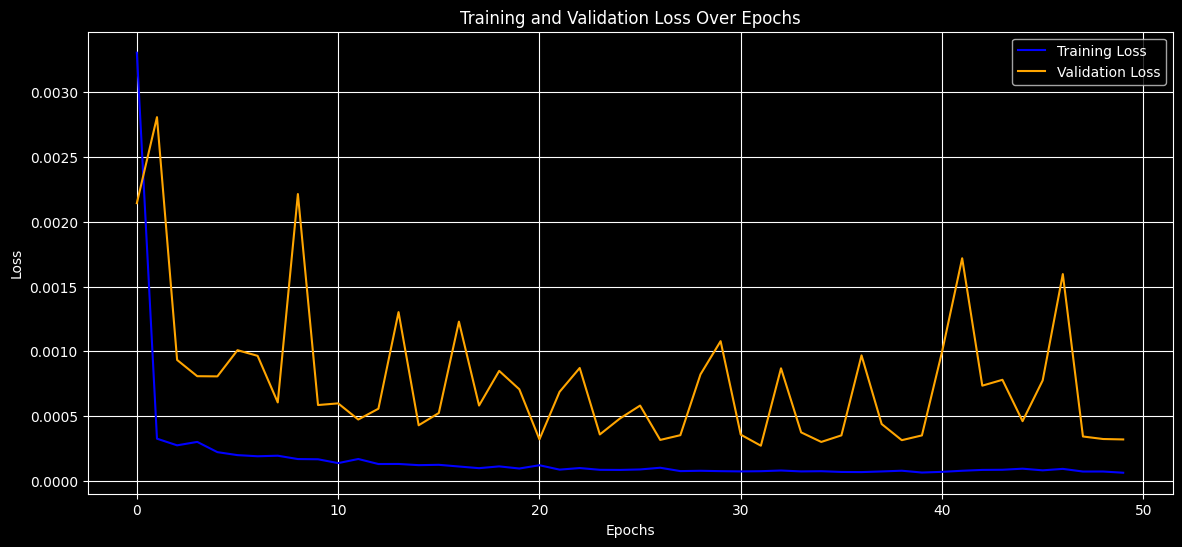

In [65]:
# Plot training and validation loss
plt.figure(figsize=(14, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig('loss_plot.png', dpi=300)
plt.show()

## Evaluate the Model

### Making Predictions and Inverse Scaling

In [66]:
# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform predictions and actual values
train_predictions = scaler.inverse_transform(train_predictions)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
test_predictions = scaler.inverse_transform(test_predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


### Model Evaluation Metrics

In [67]:
# Define a helper to compute metrics
def evaluate(y_true, y_pred):
    rmse = root_mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return rmse, mae, r2

# Evaluate both train and test sets
train_metrics = evaluate(y_train_actual, train_predictions)
test_metrics = evaluate(y_test_actual, test_predictions)

# Display results using tabulate
headers = ["Dataset", "RMSE", "MAE", "R² Score"]
rows = [
    ["Train"] + [f"{m:.2f}" for m in train_metrics],
    ["Test"] + [f"{m:.2f}" for m in test_metrics],
]
print(tabulate(rows, headers=headers, tablefmt="grid"))

+-----------+---------+---------+------------+
| Dataset   |    RMSE |     MAE |   R² Score |
+===========+=========+=========+============+
| Train     |  946.23 |  605.68 |       1    |
+-----------+---------+---------+------------+
| Test      | 1898.35 | 1390.88 |       0.99 |
+-----------+---------+---------+------------+


### Plot Predictions vs Actual Values

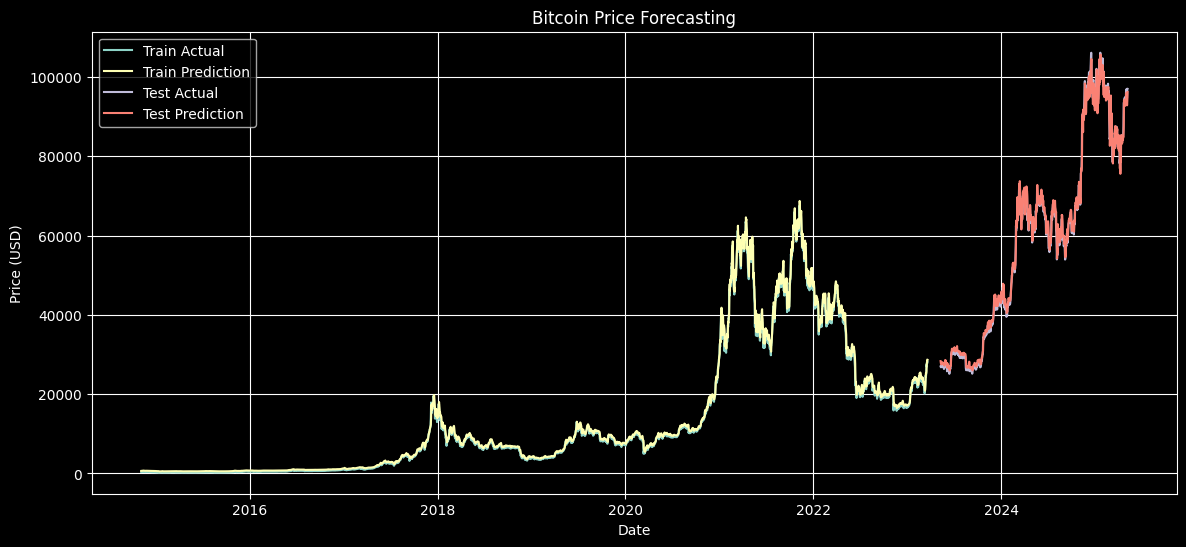

In [ ]:
# Plot predictions vs actual values
plt.figure(figsize=(14, 6))
plt.plot(df.index[sequence_length:train_size], y_train_actual, label='Train Actual')
plt.plot(df.index[sequence_length:train_size], train_predictions, label='Train Prediction')
plt.plot(df.index[train_size+sequence_length:], y_test_actual, label='Test Actual')
plt.plot(df.index[train_size+sequence_length:], test_predictions, label='Test Prediction')
plt.title('Bitcoin Price Forecasting')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.savefig('predictions_plot.png', dpi=300)
plt.show()